In [1]:
##universal setting 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
from sklearn import preprocessing
import seaborn as sns
import numpy as np

In [2]:
# data location
read_location="C:/Selina/Class/(DS_MS)/Capstone/DataSet/"
save_location="C:/Selina/Class/(DS_MS)/Capstone/Result/"
#plot color setting (https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)
my_cmap=plt.cm.get_cmap("Pastel2")
#for geopandas setting
crs={'init': 'epsg:4326'}

In [3]:
#import data
data=pd.read_csv(read_location+"AB_NYC_2019.csv")
print(data.columns)
#define the name of algebra
y="price"

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [4]:
##data distribution 
#how many missing data
data_info=pd.DataFrame()
data_info["# of unique values"]=data.nunique()
data_info["# of missing data"]=data.isnull().sum()
data_info.to_csv(save_location+"info.csv")

label_econding for neighbourhood_group : ['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']
[0.0, 0.2, 0.4, 0.6, 0.8]


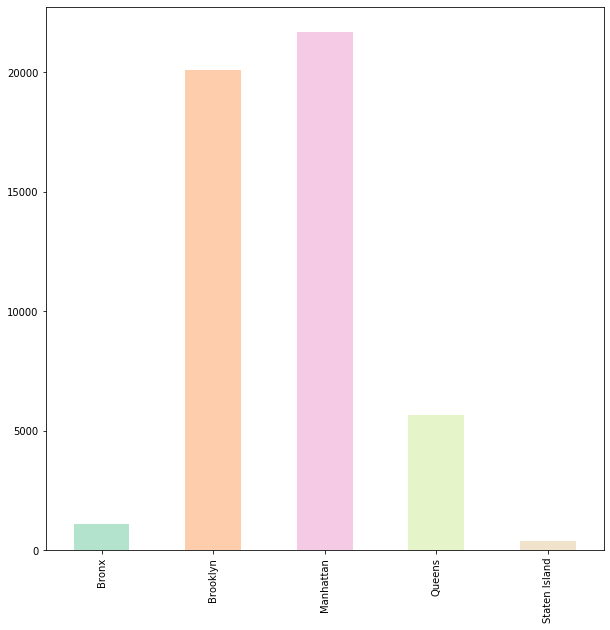

1.9.6


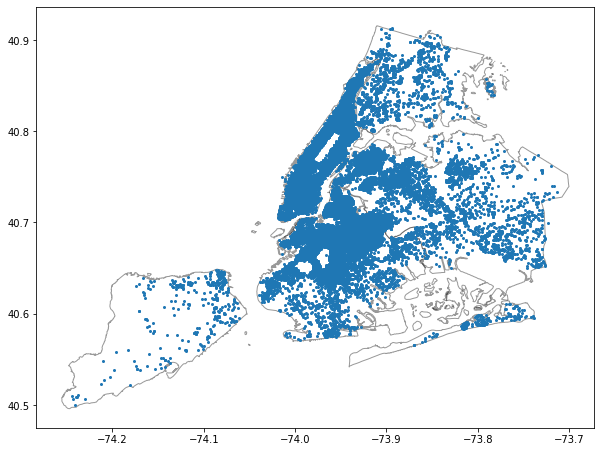

In [5]:
#variable of locations
#latitude, longitude, neighbourhood_group
name_1="neighbourhood_group"
le_nei_group = preprocessing.LabelEncoder()
le_nei_group.fit(data[name_1])
print("label_econding for",name_1, ":",le_nei_group.classes_)
#plot histogram
data_color=[i/len(le_nei_group.classes_) for i in le_nei_group.transform(le_nei_group.classes_).tolist()]
print(data_color)

#plot histogram 
fig,ax = plt.subplots(figsize=(10,10))
ax=data[name_1].value_counts().sort_index().plot.bar(color=my_cmap(data_color))
#plt.savefig(save_location+"his_group.png")
plt.show()


#plot geography
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
import pyproj
print (pyproj.__version__)
#pyproj.Proj("+init=epsg:4326")

nyc = nyc.to_crs(epsg=4326)
nyc=nyc.sort_values(by="BoroName")
data_gdf = gpd.GeoDataFrame(data.drop(['latitude', 'longitude'], axis=1),crs=crs,
                       geometry=data.apply(lambda row: shapely.geometry.Point((row.longitude, row.latitude)), axis=1))

fig,ax = plt.subplots(figsize=(10,10))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black',color="white")
data_gdf.plot(ax=ax,markersize=4)
plt.show()

#fig,ax = plt.subplots(figsize=(10,10))
#nyc.plot(ax=ax,alpha=0.4,edgecolor='black',color="white")

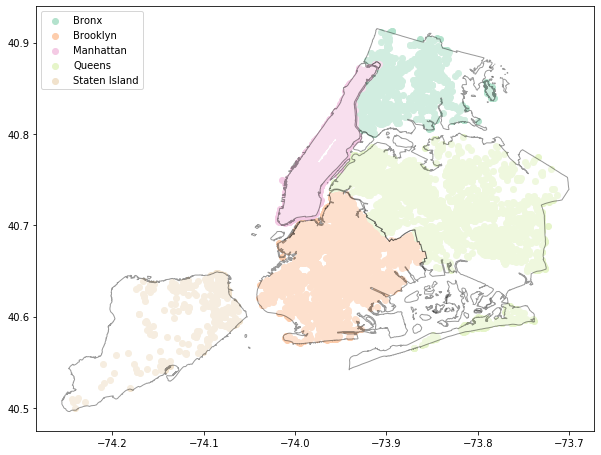

In [6]:
fig,ax = plt.subplots(figsize=(10,10))
for i in range(len(le_nei_group.classes_)):
    data_gdf[data_gdf[name_1]==le_nei_group.classes_[i]].plot(color=my_cmap(data_color[i]),label=le_nei_group.classes_[i],ax=ax)
nyc.plot(ax=ax,alpha=0.4,edgecolor='black',color="white")
plt.legend()
#plt.savefig(save_location+"map.png")
plt.show()

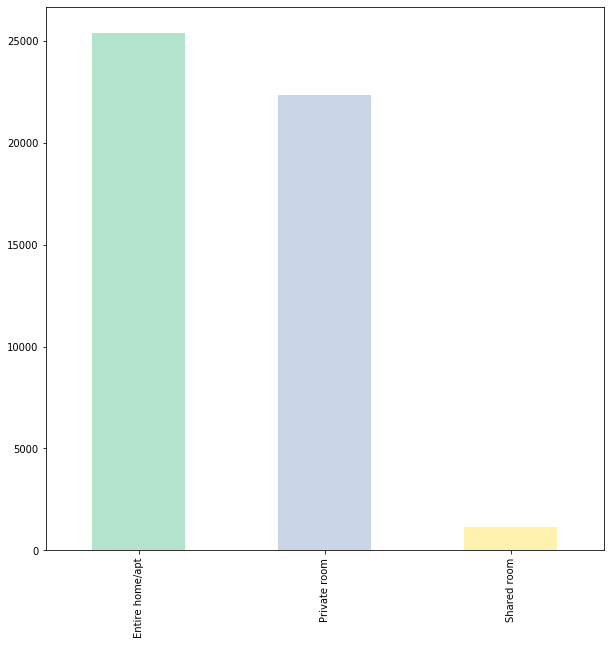

In [7]:
#variable of room type
#room_type
name_2="room_type"
dta_series=data[name_2].value_counts()
dta_nb_classes=len(dta_series)
data_color=my_cmap([i/dta_nb_classes for i in range(dta_nb_classes)])
#plot histogram 
fig,ax = plt.subplots(figsize=(10,10))
ax=dta_series.plot.bar(color=data_color)
plt.savefig(save_location+"hist_"+name_2+".png")
plt.show()

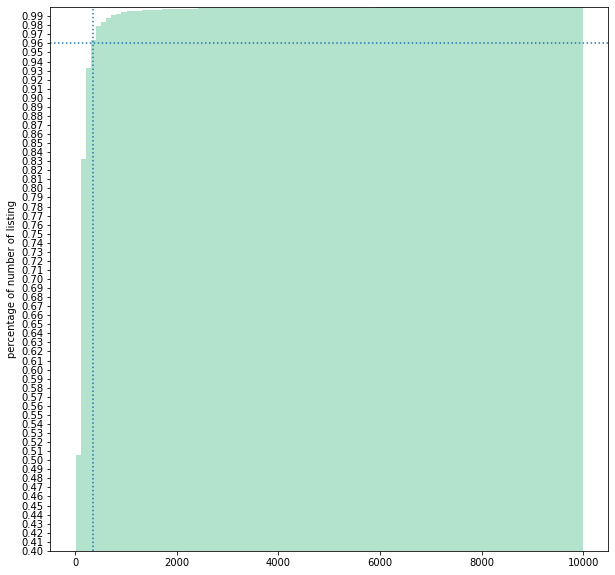

In [8]:
#variable of price
#price
name_3="price"
dta_series=data[data[name_3]!=0][name_3]

#plot histogram 
fig,ax = plt.subplots(figsize=(10,10))
ax=dta_series.plot.hist(cmap=my_cmap,cumulative=True,density=True,label=True,bins=100)
plt.yticks(np.arange(0,1, step=0.01))
plt.ylim(0.4,1)
plt.axhline(y=0.96,ls=":")
plt.axvline(x=350,ls=":")
#plt.yxhline(x=1000)
#plt.savefig(save_location+"hist_"+name_3+".png")
#plt.yscale("log")
#plt.xlim(0,1000)
#plt.xscale("log")
plt.ylabel("percentage of number of listing")
plt.savefig(save_location+"hist_"+name_3+"_Cumulative_bin_100.png")
plt.show()

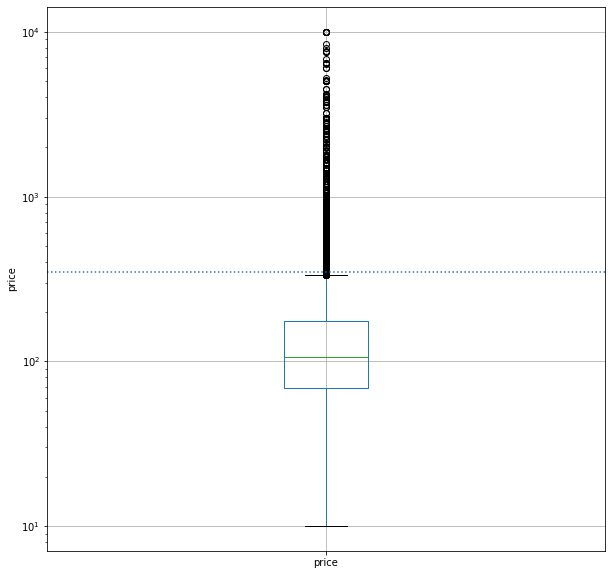

In [9]:
#variable of price
#price
name_3="price"
dta_series=data[data[name_3]!=0][name_3]

median = np.median(dta_series)
b = 1.4826

#plot histogram 
fig,ax = plt.subplots(figsize=(10,10))
ax=data[data[name_3]!=0].boxplot(column=name_3,grid=True,showcaps=True)
plt.yticks(np.arange(0,1, step=0.01))
#plt.ylim(0.4,1)
plt.axhline(y=350,ls=":")
#plt.axhline(y=29,ls=":")
#plt.axvline(x=1000,ls=":")
#plt.yxhline(x=1000)
#plt.savefig(save_location+"hist_"+name_3+".png")
plt.yscale("log")
#plt.xlim(0,1000)
#plt.xscale("log")
plt.ylabel("price")
plt.savefig(save_location+"boxplot_"+name_3+"_Cumulative_bin_100.png")
plt.show()

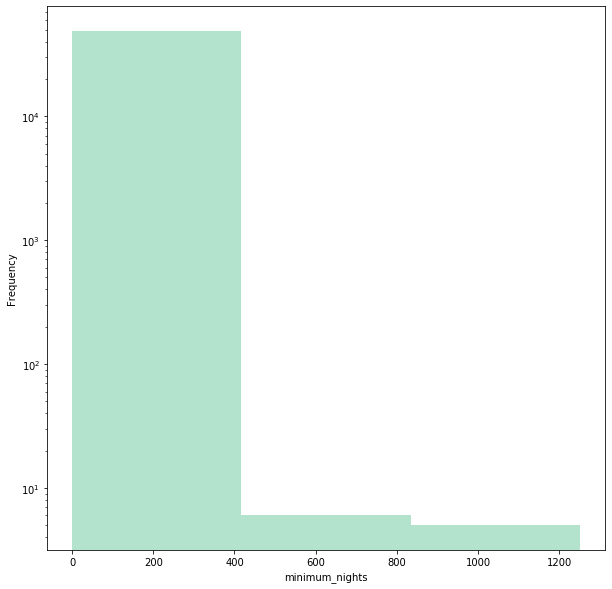

In [10]:
#variable of customer behavior
#minimum_night
name_4="minimum_nights"
dta_series=data[name_4]

#plot histogram 
fig,ax = plt.subplots(figsize=(10,10))
ax=dta_series.plot.hist(bins=3,cmap=my_cmap)
plt.savefig(save_location+"hist_"+name_4+".png")
plt.yscale("log")
plt.xlabel(name_4)
plt.show()

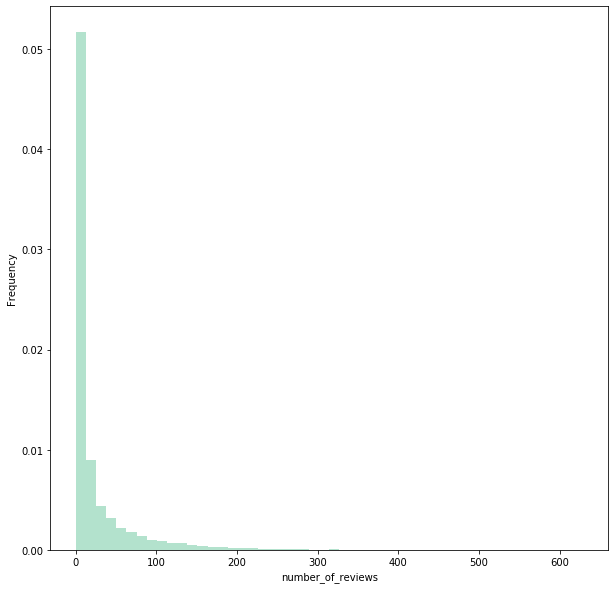

In [11]:
#variable of customer behavior
#minimum_night
name_5="number_of_reviews"
dta_series=data[name_5]

#plot histogram 
fig,ax = plt.subplots(figsize=(10,10))
ax=dta_series.plot.hist(bins=50,cmap=my_cmap,density=True)
plt.savefig(save_location+"hist_"+name_5+".png")
#plt.yscale("log")
plt.xlabel(name_5)
plt.show()

2019    25209
2018     6050
2017     3205
2016     2707
2015     1393
2014      199
2013       48
2012       25
2011        7
Name: year, dtype: int64


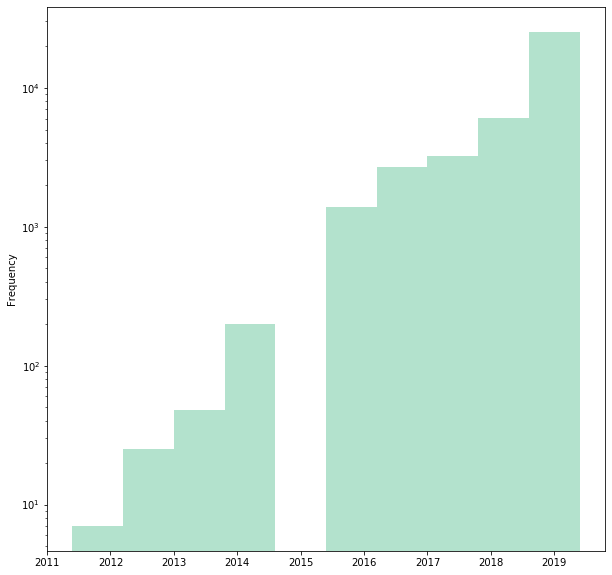

In [12]:
#variable of customer behavior
#minimum_night
name_6="last_review"

dta_series=pd.to_datetime(data[name_6],dayfirst=True)
dta_series=dta_series[pd.isna(dta_series)==False]
last_review_df=pd.DataFrame()
last_review_df["year"]=dta_series.apply(lambda x: x.year)
last_review_df["month"]=dta_series.apply(lambda x: x.month)
last_review_df["day"]=dta_series.apply(lambda x:x.day)
last_review_df.sort_values(by=["day","month","year"])
#plot histogram 
fig,ax = plt.subplots(figsize=(10,10))
ax=last_review_df.year.plot.hist(cmap=my_cmap,align="right")
print(last_review_df.year.value_counts())
#plt.savefig(save_location+"hist_"+name_6+".png")
plt.yscale("log")
#plt.xlabel(name_6)
#plt.show()

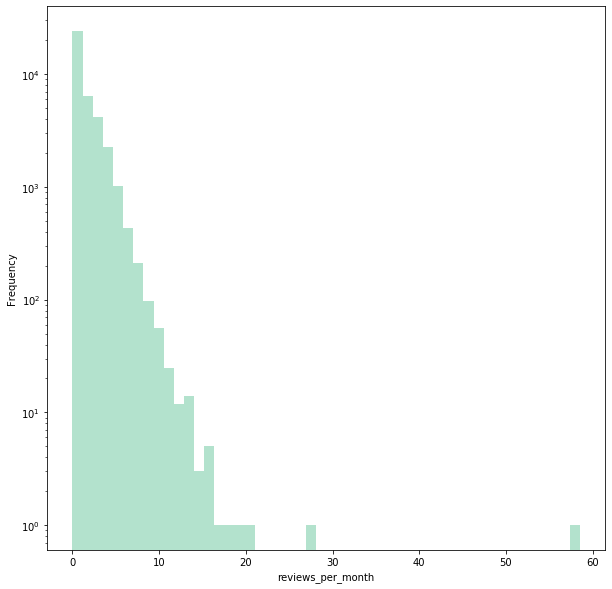

In [13]:
#variable of customer behavior
#minimum_night
name_7="reviews_per_month"
dta_series=data[name_7]

#plot histogram 
fig,ax = plt.subplots(figsize=(10,10))
ax=dta_series.plot.hist(bins=50,cmap=my_cmap)
plt.savefig(save_location+"hist_"+name_7+".png")
plt.yscale("log")
plt.xlabel(name_7)
plt.show()

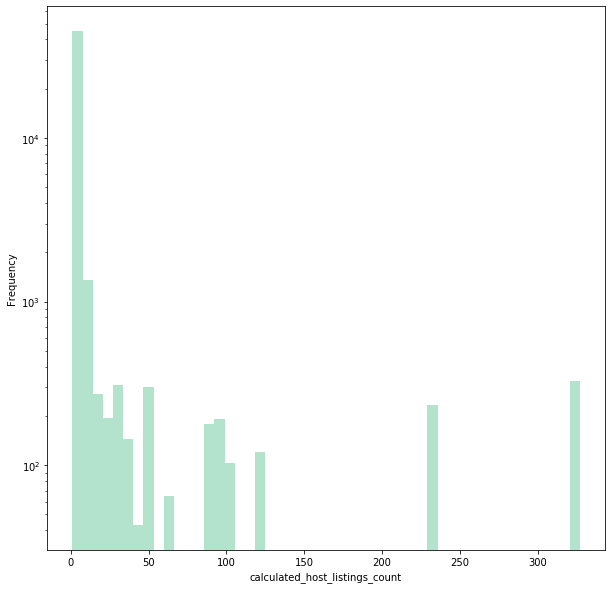

In [14]:
#variable of customer behavior
#minimum_night
name_8="calculated_host_listings_count"
dta_series=data[name_8]

#plot histogram 
fig,ax = plt.subplots(figsize=(10,10))
ax=dta_series.plot.hist(bins=50,cmap=my_cmap)
plt.savefig(save_location+"hist_"+name_8+".png")
plt.yscale("log")
plt.xlabel(name_8)
plt.show()

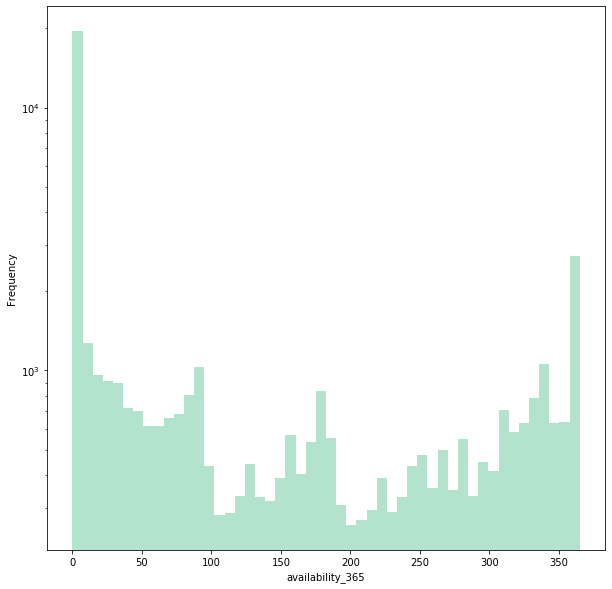

In [15]:
#variable of customer behavior
#minimum_night
name_9="availability_365"
dta_series=data[name_9]

#plot histogram 
fig,ax = plt.subplots(figsize=(10,10))
ax=dta_series.plot.hist(bins=50,cmap=my_cmap)
plt.savefig(save_location+"hist_"+name_9+".png")
plt.yscale("log")
plt.xlabel(name_9)
plt.show()